<a href="https://colab.research.google.com/github/sriyanshhh/location/blob/main/ML_Graded_Assignment1_SriyanshKumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"><b>Imports</b></h2>

In [ ]:
# Imports and Setup

import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Base Directory
base_dir = r"D:\ML_Graded_Assignment1_SriyanshKumar"

# Helper Function to Save Plots
def save_plot(fig, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    fig.savefig(path, bbox_inches='tight', facecolor='white', dpi=300)
    plt.close(fig)
    print(f"✅ Saved: {path}")


<h2 align="center"><b>Task 1: Linear Regression with Gradient Descent Variants</b></h2>

Using Colab cache for faster access to the 'indian-districts-population-data' dataset.
Using file: /kaggle/input/indian-districts-population-data/census2011.csv
Selected target variable: literacy

Validation (lr=0.01)
BGD: MSE=0.8794, RMSE=0.9378, MAE=0.7426, R2=-0.0559
SGD: MSE=0.9377, RMSE=0.9684, MAE=0.7476, R2=-0.1259


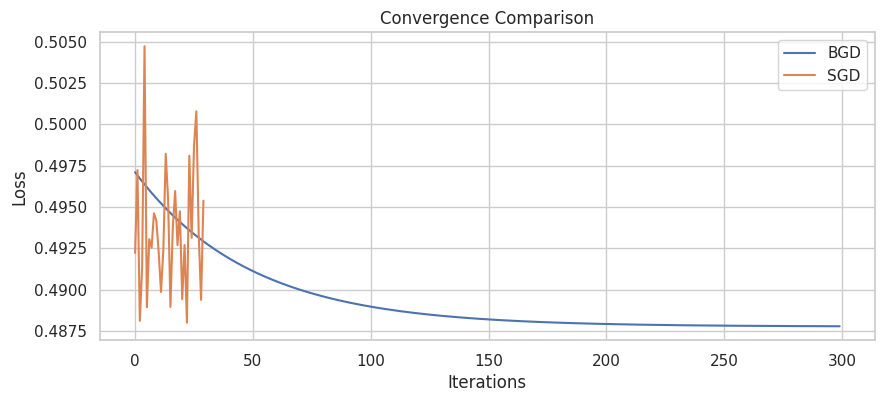

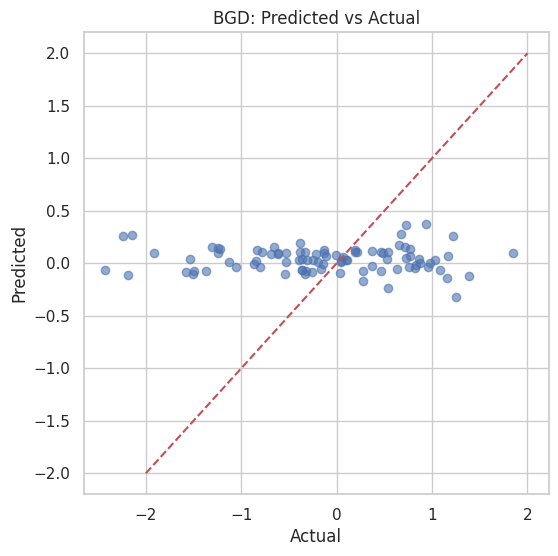

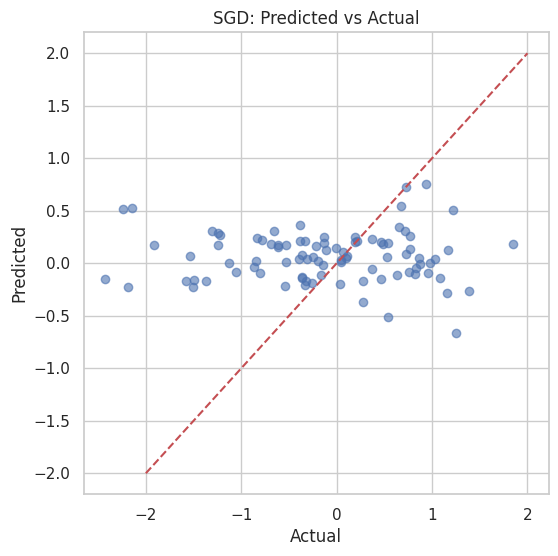

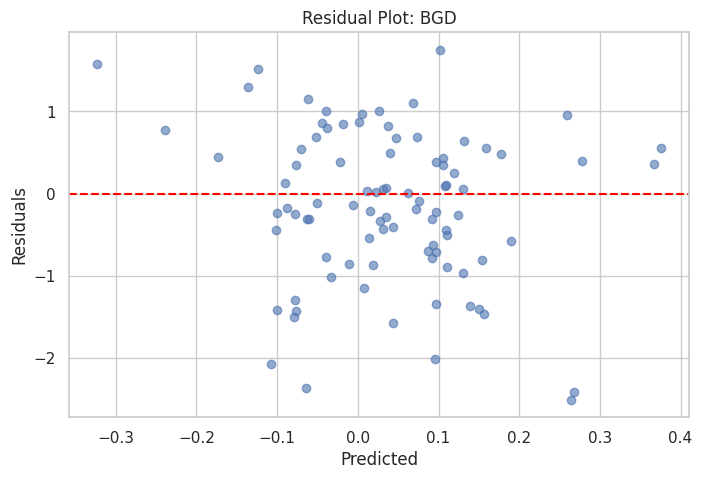

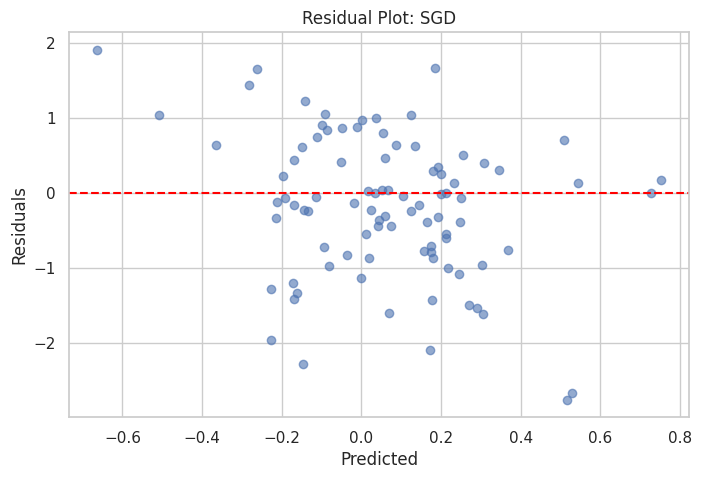

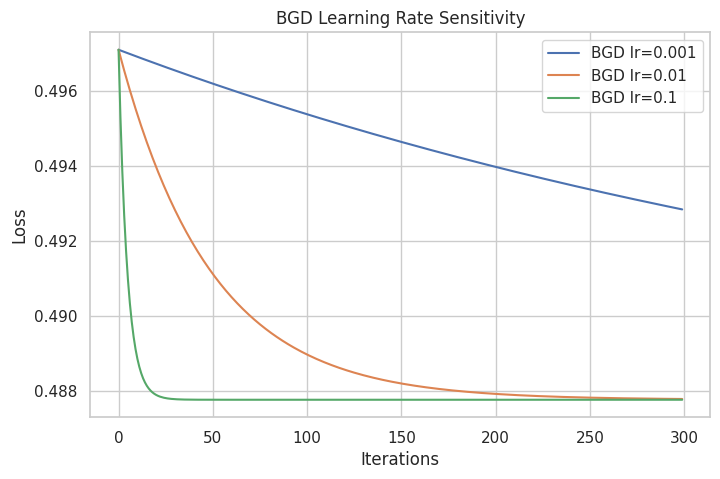

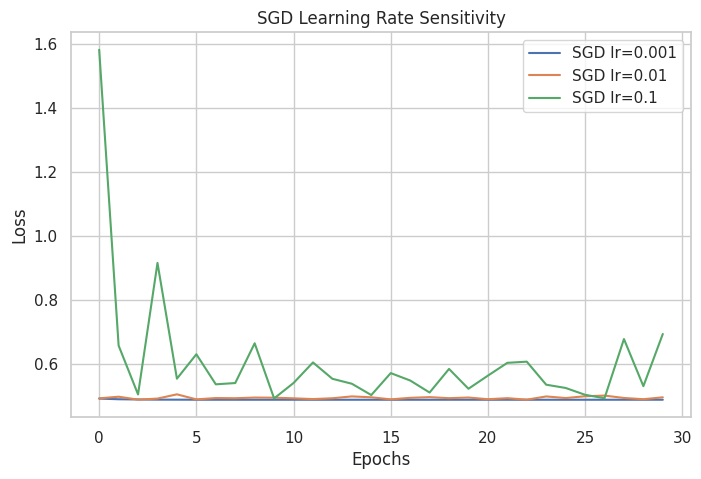

In [8]:
# === TASK 1: LINEAR REGRESSION

import kagglehub, os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

path = kagglehub.dataset_download("shiivvvaam/indian-districts-population-data")

for f in os.listdir(path):
    if f.endswith(".csv"):
        data_path = os.path.join(path, f)
        break

print("Using file:", data_path)

df = pd.read_csv(data_path)
df.columns = [c.strip().replace(' ', '_').lower() for c in df.columns]

possible_targets = [c for c in df.columns if 'literacy' in c]
if possible_targets:
    target = possible_targets[0]
else:
    target = df.columns[-1]

print("Selected target variable:", target)

df = df.select_dtypes(include=[np.number]).dropna()

X = df.drop(columns=[target]).values
y = df[target].values.reshape(-1,1)
X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)
y = (y - y.mean()) / (y.std() + 1e-8)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))
X_val   = np.hstack((np.ones((X_val.shape[0],1)), X_val))
X_test  = np.hstack((np.ones((X_test.shape[0],1)), X_test))

def batch_gradient_descent(X, y, lr=0.01, epochs=500):
    m, n = X.shape
    theta = np.zeros((n,1))
    losses = []
    for _ in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y
        grad = (1/m) * X.T.dot(error)
        theta -= lr * grad
        loss = (1/(2*m)) * np.sum(error**2)
        losses.append(loss)
    return theta, losses

def stochastic_gradient_descent(X, y, lr=0.01, epochs=50):
    m, n = X.shape
    theta = np.zeros((n,1))
    losses = []
    for epoch in range(epochs):
        indices = np.arange(m)
        np.random.shuffle(indices)
        for i in indices:
            xi = X[i:i+1]
            yi = y[i:i+1]
            error = xi.dot(theta) - yi
            grad = xi.T.dot(error)
            theta -= lr * grad
        losses.append((1/(2*m)) * np.sum((X.dot(theta)-y)**2))
    return theta, losses

lrs = [0.001, 0.01, 0.1]
results = {}
for lr in lrs:
    theta_bgd, loss_bgd = batch_gradient_descent(X_train, y_train, lr=lr, epochs=300)
    theta_sgd, loss_sgd = stochastic_gradient_descent(X_train, y_train, lr=lr, epochs=30)
    results[lr] = (theta_bgd, loss_bgd, theta_sgd, loss_sgd)

def evaluate_model(X, y, theta):
    y_pred = X.dot(theta)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return y_pred, mse, rmse, mae, r2

lr = 0.01
theta_bgd, loss_bgd, theta_sgd, loss_sgd = results[lr]
y_val_pred_bgd, mse_bgd, rmse_bgd, mae_bgd, r2_bgd = evaluate_model(X_val, y_val, theta_bgd)
y_val_pred_sgd, mse_sgd, rmse_sgd, mae_sgd, r2_sgd = evaluate_model(X_val, y_val, theta_sgd)

print(f"\nValidation (lr=0.01)")
print(f"BGD: MSE={mse_bgd:.4f}, RMSE={rmse_bgd:.4f}, MAE={mae_bgd:.4f}, R2={r2_bgd:.4f}")
print(f"SGD: MSE={mse_sgd:.4f}, RMSE={rmse_sgd:.4f}, MAE={mae_sgd:.4f}, R2={r2_sgd:.4f}")

plt.figure(figsize=(10,4))
plt.plot(loss_bgd, label='BGD')
plt.plot(loss_sgd, label='SGD')
plt.xlabel("Iterations"); plt.ylabel("Loss")
plt.title("Convergence Comparison"); plt.legend(); plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_val, y_val_pred_bgd, alpha=0.6)
plt.plot([-2,2],[-2,2],'r--')
plt.title("BGD: Predicted vs Actual"); plt.xlabel("Actual"); plt.ylabel("Predicted"); plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_val, y_val_pred_sgd, alpha=0.6)
plt.plot([-2,2],[-2,2],'r--')
plt.title("SGD: Predicted vs Actual"); plt.xlabel("Actual"); plt.ylabel("Predicted"); plt.show()

residuals_bgd = y_val - y_val_pred_bgd
residuals_sgd = y_val - y_val_pred_sgd

plt.figure(figsize=(8,5))
plt.scatter(y_val_pred_bgd, residuals_bgd, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot: BGD"); plt.xlabel("Predicted"); plt.ylabel("Residuals"); plt.show()

plt.figure(figsize=(8,5))
plt.scatter(y_val_pred_sgd, residuals_sgd, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot: SGD"); plt.xlabel("Predicted"); plt.ylabel("Residuals"); plt.show()

plt.figure(figsize=(8,5))
for lr,(tb,tb_loss,ts,ts_loss) in results.items():
    plt.plot(tb_loss, label=f"BGD lr={lr}")
plt.title("BGD Learning Rate Sensitivity")
plt.xlabel("Iterations"); plt.ylabel("Loss"); plt.legend(); plt.show()

plt.figure(figsize=(8,5))
for lr,(tb,tb_loss,ts,ts_loss) in results.items():
    plt.plot(ts_loss, label=f"SGD lr={lr}")
plt.title("SGD Learning Rate Sensitivity")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.legend(); plt.show()


<h2 align="center"><b>Task 2: KNN Classifier</b></h2>

Using Colab cache for faster access to the 'indian-districts-population-data' dataset.
Using file: /kaggle/input/indian-districts-population-data/census2011.csv
Selected target variable: literacy
k=3: mean CV accuracy=0.5579 ± 0.0135
k=5: mean CV accuracy=0.5791 ± 0.0078
k=7: mean CV accuracy=0.6043 ± 0.0153


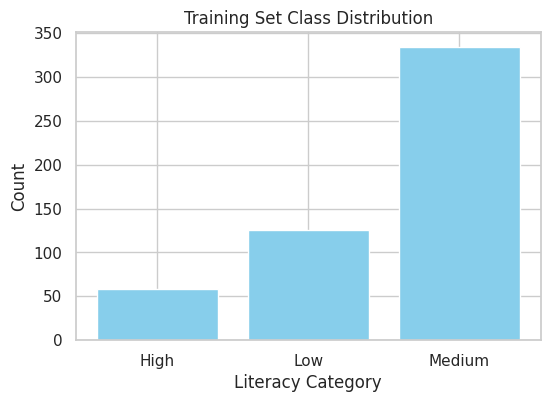

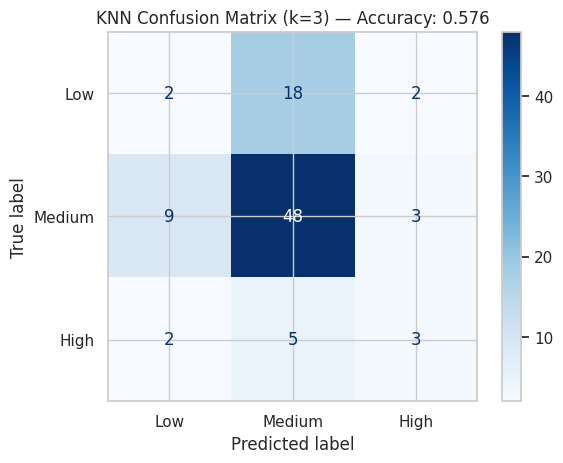

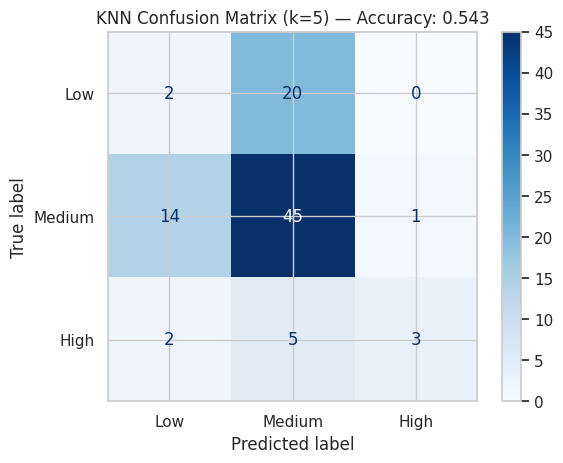

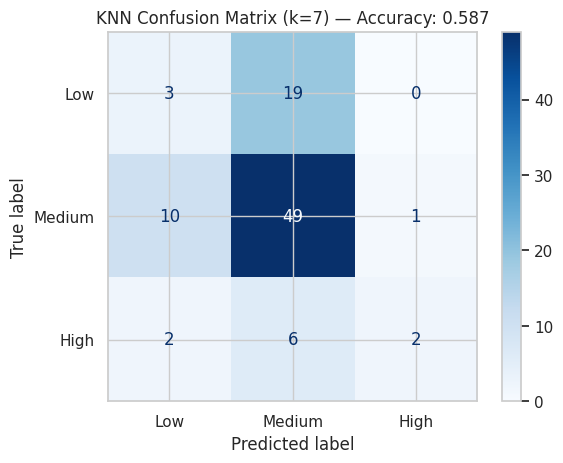

In [9]:
# === TASK 2: K-NEAREST NEIGHBORS (from scratch) ===

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Load same dataset
import kagglehub, os
path = kagglehub.dataset_download("shiivvvaam/indian-districts-population-data")
for f in os.listdir(path):
    if f.endswith(".csv"):
        data_path = os.path.join(path, f)
        break

print("Using file:", data_path)

df = pd.read_csv(data_path)
df.columns = [c.strip().replace(' ', '_').lower() for c in df.columns]

possible_targets = [c for c in df.columns if 'literacy' in c]
if possible_targets:
    target = possible_targets[0]
else:
    target = df.columns[-1]

print("Selected target variable:", target)

# Clean numeric columns
df = df.select_dtypes(include=[np.number]).dropna()

# Create categorical literacy labels
def literacy_category(x):
    if x < 65:
        return 'Low'
    elif x <= 85:
        return 'Medium'
    else:
        return 'High'

df['literacy_category'] = df[target].apply(literacy_category)
X = df.drop(columns=[target, 'literacy_category']).values
y = df['literacy_category'].values

# Normalize features
X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Distance function (Euclidean)
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Predict using KNN
def knn_predict(X_train, y_train, X_test, k=3):
    y_pred = []
    for x in X_test:
        distances = np.array([euclidean_distance(x, x_train) for x_train in X_train])
        nn_indices = np.argsort(distances)[:k]
        nn_labels = y_train[nn_indices]
        vals, counts = np.unique(nn_labels, return_counts=True)
        y_pred.append(vals[np.argmax(counts)])
    return np.array(y_pred)

# Cross-validation
def k_fold_cv(X, y, k_neighbors=3, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    accs = []
    for train_idx, val_idx in kf.split(X):
        X_train_k, X_val_k = X[train_idx], X[val_idx]
        y_train_k, y_val_k = y[train_idx], y[val_idx]
        y_pred_k = knn_predict(X_train_k, y_train_k, X_val_k, k_neighbors)
        accs.append(accuracy_score(y_val_k, y_pred_k))
    return np.mean(accs), np.std(accs)

# Compare for k=3,5,7
results = {}
for k in [3,5,7]:
    mean_acc, std_acc = k_fold_cv(X_train, y_train, k_neighbors=k, folds=5)
    print(f"k={k}: mean CV accuracy={mean_acc:.4f} ± {std_acc:.4f}")
    y_pred_test = knn_predict(X_train, y_train, X_test, k)
    acc_test = accuracy_score(y_test, y_pred_test)
    results[k] = (y_pred_test, acc_test)

# Class distribution
classes, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(6,4))
plt.bar(classes, counts, color='skyblue')
plt.title("Training Set Class Distribution")
plt.xlabel("Literacy Category"); plt.ylabel("Count"); plt.show()

# Confusion matrices for each k
for k, (y_pred_test, acc) in results.items():
    cm = confusion_matrix(y_test, y_pred_test, labels=['Low','Medium','High'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low','Medium','High'])
    disp.plot(cmap='Blues')
    plt.title(f"KNN Confusion Matrix (k={k}) — Accuracy: {acc:.3f}")
    plt.show()
